In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-dataset/WineQT.csv


In [2]:
#Gerekli kütüphaneler dahil edilmiş ve veri seti okunmuştur.
import matplotlib.pyplot as plt
import seaborn as sns
import keras

dataframe = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')

dataframe.sample(10)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
393,6.8,0.510,0.01,2.1,0.074,9.0,25.0,0.99580,3.33,0.56,9.5,6,550
1134,7.5,0.310,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,6,1586
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,7
52,6.8,0.785,0.00,2.4,0.104,14.0,30.0,0.99660,3.52,0.55,10.7,6,77
413,8.8,0.470,0.49,2.9,0.085,17.0,110.0,0.99820,3.29,0.60,9.8,5,578
472,9.4,0.590,0.14,2.0,0.084,25.0,48.0,0.99810,3.14,0.56,9.7,5,665
782,8.1,0.780,0.10,3.3,0.090,4.0,13.0,0.99855,3.36,0.49,9.5,5,1108
1007,6.2,0.580,0.00,1.6,0.065,8.0,18.0,0.99660,3.56,0.84,9.4,5,1415
607,9.3,0.430,0.44,1.9,0.085,9.0,22.0,0.99708,3.28,0.55,9.5,5,851
952,7.5,0.510,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.5,6,1339


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
#Id sütunu,modelin eğitiminde kullanılmayacağı için veri setinden kaldırılmıştır.
dataframe.drop("Id",axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [5]:
#Hedef değişkeni olarak Quality seçilmiş ve gerekli kütüphane impport edilmiştir.
x = dataframe.drop(['quality'], axis=1)
y = dataframe['quality']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,shuffle=False,test_size=0.3)

/tmp/ipykernel_31/3794668626.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe["quality"],color="#ff5733",shade=True)


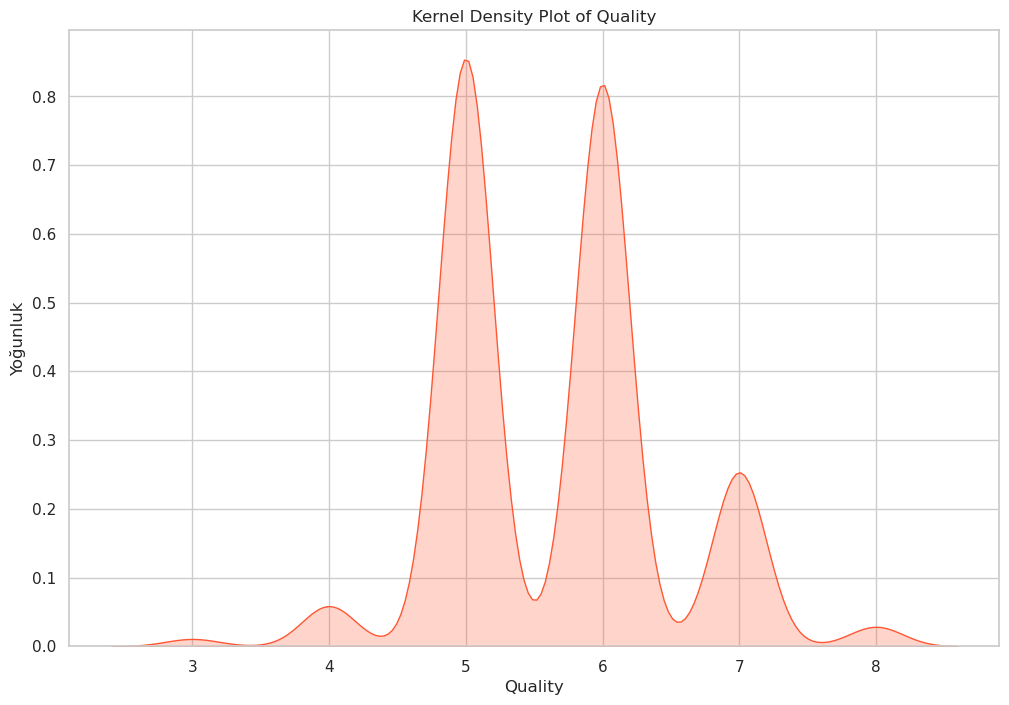

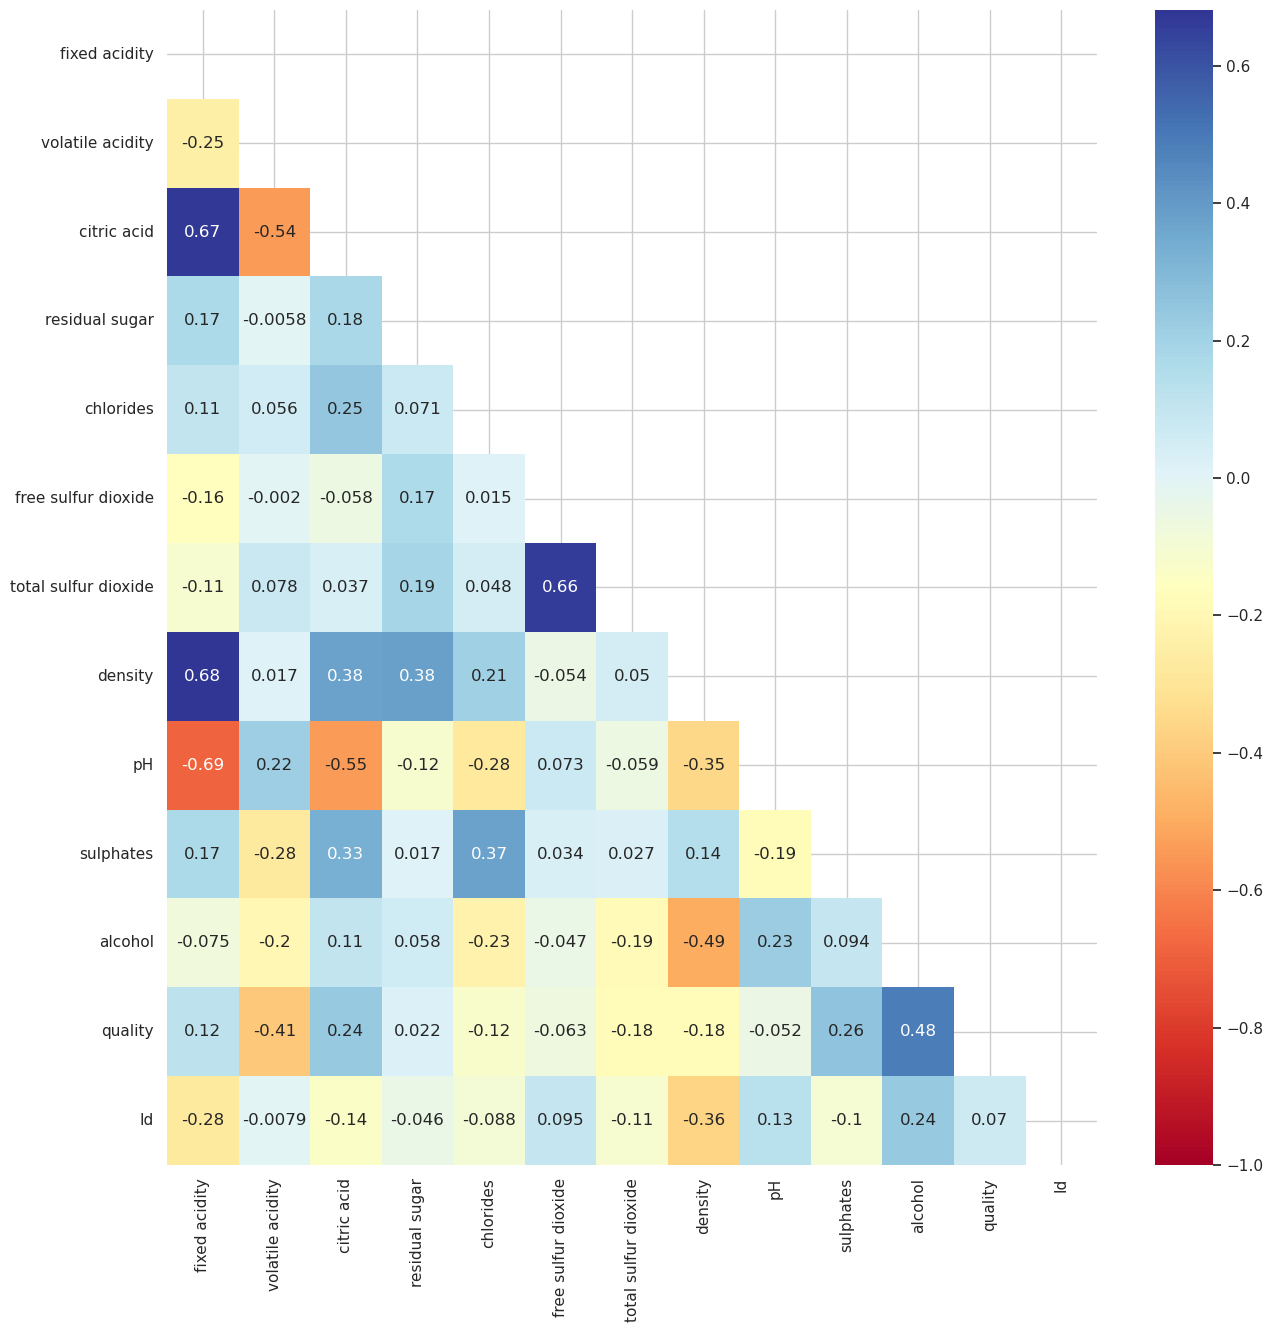

In [6]:
#Hedef değişkenimiz olan Quality sütunun Kernel Yoğunluk grafiğini hesaplanmıştır.
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
sns.kdeplot(dataframe["quality"],color="#ff5733",shade=True)
plt.xlabel("Quality")  
plt.ylabel("Yoğunluk")
plt.title("Kernel Density Plot of Quality")  

plt.show()  


#Heatmap tercih edilmi ve korelasyon değerleri hesaplanmıştır.
corr = dataframe.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='RdYlBu', annot=True, mask=mask)
plt.show()



In [7]:
#Quality sütunu 1-8 arasında değerlerden meydana gelmektedir ve bu değerlerin one hot encoding yöntemiyle analiz edilebilmesi için 1 ve 0 olacak şekilde düzenlemesi yapılmıştır.
dataframe["quality"]= dataframe["quality"].apply(lambda x:1 if x> 6 else 0)



In [8]:
#Data frame tekrar incelendiğinde önceden 1-8 arasında değer alan Quality sütunun artık 0 ve 1 değerlerinde oluştuğu görülmektedir.
dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0,1595


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import tensorflow as tf
from tensorflow.keras.models import Sequential
classifier = Sequential()

x = dataframe.drop(['quality'], axis=1)
y = dataframe['quality']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,shuffle=False,test_size=0.3)

#Oluşturulacak olan ANN modelinin ilk(input) katmanı oluşturulmuştur.
l1=classifier.add(Dense(units = 256, kernel_initializer="glorot_uniform", activation = 'relu', input_dim = len(x.columns), name="inputLayer"))

# İkinci katman oluşturulmuştur.
classifier.add(Dense(units = 128, kernel_initializer="glorot_uniform", activation = 'relu', name="layer2"))

#Dropout modelin overliftingden korunmasını sağlamak amacıyla tercih edilmiştir.
classifier.add(Dropout(0.4))

# Üçüncü katman oluşturulmuştur.
classifier.add(Dense(units = 72, kernel_initializer="glorot_uniform", activation = 'relu'))
classifier.add(Dropout(0.4))

# Çıkış(output) katmanı oluşturulmuştur.
classifier.add(Dense(units = 9,kernel_initializer="glorot_uniform", activation = 'softmax',))


# YSA'nın Derlenmesi | SGD'nin YSA'nın tamamına uygulanması anlamına gelir.

classifier.compile(optimizer ="adam", loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])
classifier.fit(x_train, y_train, batch_size = 64, epochs = 32)

score, acc = classifier.evaluate(x_train, y_train,
                            batch_size=64)
print('Train score:', score)
print('Train accuracy:', acc)

#  Tahmin yapma ve modeli değerlendirme

# Test seti sonuçlarını tahmin etme
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(x_test, y_test,
                            batch_size=64)
print('Test score:', score)
print('Test accuracy:', acc)



In [10]:
y_pred = classifier.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)



11/11 [==============================] - 0s 1ms/step


In [11]:

dataframe['quality'] = dataframe['quality'].astype('category')

In [12]:
#multiclass classificaiton hesaplamak için modelin eğitilmesi.
x = dataframe.drop(['quality'], axis=1)
y = dataframe['quality']

# Kategorik etiketleri sayısal değerlere dönüştürün
y = pd.get_dummies(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

classifier = Sequential()

#Katmanların oluşturulması.
classifier.add(Dense(units=256, kernel_initializer="glorot_uniform", activation='relu', input_dim=len(x.columns), name="input_layer"))
classifier.add(Dropout(0.15))

classifier.add(Dense(units=128, kernel_initializer="glorot_uniform", activation='relu', name="hidden_layer2"))
classifier.add(Dropout(0.15))

classifier.add(Dense(units=72, kernel_initializer="glorot_uniform", activation='relu', name="hidden_layer3"))
classifier.add(Dropout(0.15))

classifier.add(Dense(units=36, kernel_initializer="glorot_uniform", activation='relu', name="hidden_layer4"))
classifier.add(Dense(units=len(y.columns), kernel_initializer="glorot_uniform", activation='softmax', name="output_layer"))

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classifier.fit(x_train, y_train, batch_size=64, epochs=36)

train_loss, train_acc = classifier.evaluate(x_train, y_train, batch_size=64)


Epoch 1/36
13/13 [==============================] - 1s 4ms/step - loss: 5.3966 - accuracy: 0.7387
Epoch 2/36
13/13 [==============================] - 0s 4ms/step - loss: 2.6888 - accuracy: 0.7937
Epoch 3/36
13/13 [==============================] - 0s 4ms/step - loss: 2.1636 - accuracy: 0.7425
Epoch 4/36
13/13 [==============================] - 0s 4ms/step - loss: 1.5562 - accuracy: 0.7550
Epoch 5/36
13/13 [==============================] - 0s 4ms/step - loss: 1.3339 - accuracy: 0.7800
Epoch 6/36
13/13 [==============================] - 0s 4ms/step - loss: 1.0144 - accuracy: 0.7788
Epoch 7/36
13/13 [==============================] - 0s 3ms/step - loss: 0.8369 - accuracy: 0.8037
Epoch 8/36
13/13 [==============================] - 0s 3ms/step - loss: 0.8521 - accuracy: 0.7875
Epoch 9/36
13/13 [==============================] - 0s 4ms/step - loss: 0.7426 - accuracy: 0.7987
Epoch 10/36
13/13 [==============================] - 0s 3ms/step - loss: 0.7759 - accuracy: 0.8025
Epoch 11/36
13/13 [